# 1. Setup


In [1]:
# Miguel Nieves Hernandez
# 10/13/2023
# Assignment 2
# Dataset: Miami Housing Prices
# This data set contains details about properties in the Miami area, which captures there sale prices, Physical attributes, 
# proximity to various amenities and there geographic coordinates 
# dataset: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm 
import statsmodels.stats.outliers_influence as inf
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
housing = pd.read_csv('MiamiHousing.csv')

In [3]:
housing.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [5]:
# Evaluation set with 5 rows represented as a dictionary
# SALE_PRC: The sale price of the property in dollars.
# TOT_LVG_AREA: The land's total living area in square feet.
# OCEAN_DIST: Distance from the property to the ocean in feet.
# HWY_DIST: Proximity from the property to the nearest highway in feet.
# CNTR_DIST: Distance from the property to Miami's central business district in feet.

data_points = [
    {
        'SALE_PRC': 440000,
        'TOT_LVG_AREA':1000,
        'OCEAN_DIST': 11753,
        'HWY_DIST': 18000,
        'CNTR_DIST': 42000
    },
    {
        'SALE_PRC': 300000,
        'TOT_LVG_AREA':1700,
        'OCEAN_DIST': 12000,
        'HWY_DIST': 20000,
        'CNTR_DIST': 50000
    },
    {
        'SALE_PRC': 350000,
        'TOT_LVG_AREA': 12000,
        'OCEAN_DIST': 10000,
        'HWY_DIST': 15000,
        'CNTR_DIST': 45000
    },
    {
        'SALE_PRC': 600000,
        'TOT_LVG_AREA': 1100,
        'OCEAN_DIST': 16000,
        'HWY_DIST': 12000,
        'CNTR_DIST': 48000
    },
    {
        'SALE_PRC': 700000,
        'TOT_LVG_AREA': 1500,
        'OCEAN_DIST': 5000,
        'HWY_DIST': 2000,
        'CNTR_DIST': 53000
    }
]

# 2. Multicollinearity

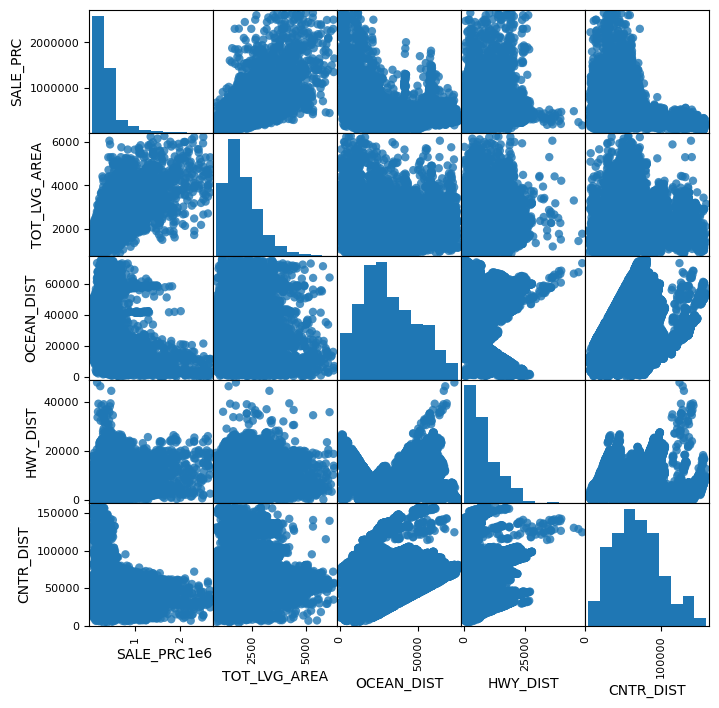

In [6]:
# Extracting a subset of the data with selected predictors
# For this example, we'll use 'SALE_PRC', 'TOT_LVG_AREA', 'OCEAN_DIST','HWY_DIST', and CNTR_DIST
selected_predictors = ['SALE_PRC', 'TOT_LVG_AREA', 'OCEAN_DIST', 'HWY_DIST','CNTR_DIST']
X = housing[selected_predictors]

# Visualizing the relationships using Scatter Plot Matrix
scatter_matrix_plot = pd.plotting.scatter_matrix(X, figsize=(8, 8), alpha=0.8, marker='o', diagonal='hist')
plt.show()

In [7]:
# Visual Observations
# - SALE_PRC does not seem to have much correlation with the other predictors
# - LND_SQFOOT also does not seem to have much correlation with the other predictors
# - OCEAN_DIS This seems to have the most correlation with HWY_DST and CNT_DST
# - HWY_DST This also seems to have good correlation with CNTR_DIST
# - CNTR_DIST This seems to have a strong positive correlation with Ocean_DST 

In [8]:
# VIF (Variance Inflation Factor)
for i in range(X.shape[1]):
    vif = inf.variance_inflation_factor(X.values, i)  # Compute VIF
    print(f"VIF for {X.columns[i]}: \t{vif:10.3f}")
    

VIF for SALE_PRC: 	     6.519
VIF for TOT_LVG_AREA: 	    15.510
VIF for OCEAN_DIST: 	     4.012
VIF for HWY_DIST: 	     2.868
VIF for CNTR_DIST: 	     6.393


In [9]:
# Observations from VIF:

# SALE_PRC (Sale price of the property) - Low VIF; limited multicollinearity with other predictors, 
# suggesting that SALE_PRC is largely independent and not easily predictable from the other predictors.

# TOT_LVG_AREA (The land's total area in square feet) - Moderate VIF; some multicollinearity present, 
# indicating that other predictors might contain some information about LND_SQFOOT, but it retains significant unique information.

# OCEAN_DIST (Distance from the property to the ocean) - Moderate VIF; some multicollinearity with other predictors, 
# which suggests that OCEAN_DIST shares some variance with other variables, but not overwhelmingly so.

# HWY_DIST (Proximity from the property to the nearest highway) - Low VIF; limited multicollinearity with other predictors, 
# which means HWY_DIST is largely distinct and isn't heavily influenced by the other predictors in the model.

# CNTR_DIST (Distance from the property to Miami's central business district) - Moderate-High VIF; noticeable multicollinearity 
# with other predictors, indicating that CNTR_DIST might be somewhat predictable from other variables in the dataset, 
# suggesting caution when interpreting its independent effect.


# 3 Simple Linear Regression


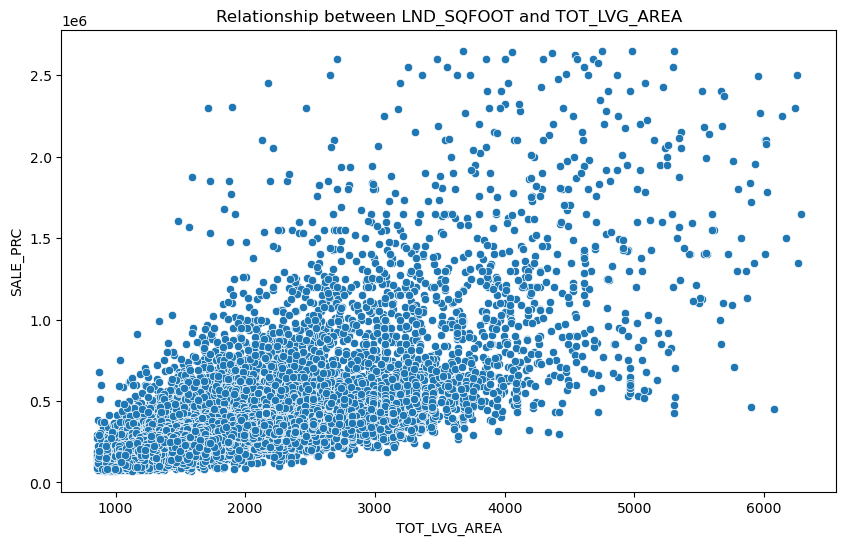

In [10]:
# scatter Plot
# using 'TOT_LVG_AREA' as predictor and 'SALE_PRC' as response
X = housing['TOT_LVG_AREA']
Y = housing['SALE_PRC']

# plotting the data
plt.figure(figsize=(10,6))
sns.scatterplot(x=X, y=Y, data=housing)
plt.title('Relationship between LND_SQFOOT and TOT_LVG_AREA')
plt.show()


In [11]:
# Adding a constant to X (this accounts for the intercept)
X = sm.add_constant(X)
y = housing['SALE_PRC']

# Fitting an OLS (Ordinary Least Squares) linear model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               SALE_PRC   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:37:40   Log-Likelihood:            -1.9214e+05
No. Observations:               13932   AIC:                         3.843e+05
Df Residuals:                   13930   BIC:                         3.843e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.355e+05   5445.186    -24.893   

In [12]:
# Observations:
# Intercept coefficient: -135,500.

# TOT_LVG_AREA coefficient: 260.1938. For every one-unit increase in TOT_LVG_AREA, the SALE_PRC 
# is expected to increase by approximately $260.19.

# R-squared: 0.445 – This suggests that approximately 44.5% of the variability in the dependent variable, SALE_PRC,
# can be explained by the model. This means that the model captures almost half of the variability in property prices 
# using TOT_LVG_AREA as a predictor.

### 4.1 Model Equation

### 4.2 $\hat{SALE\_PRC}_i = -135,500 + 260.1938 \times TOT\_LVG\_AREA_i$


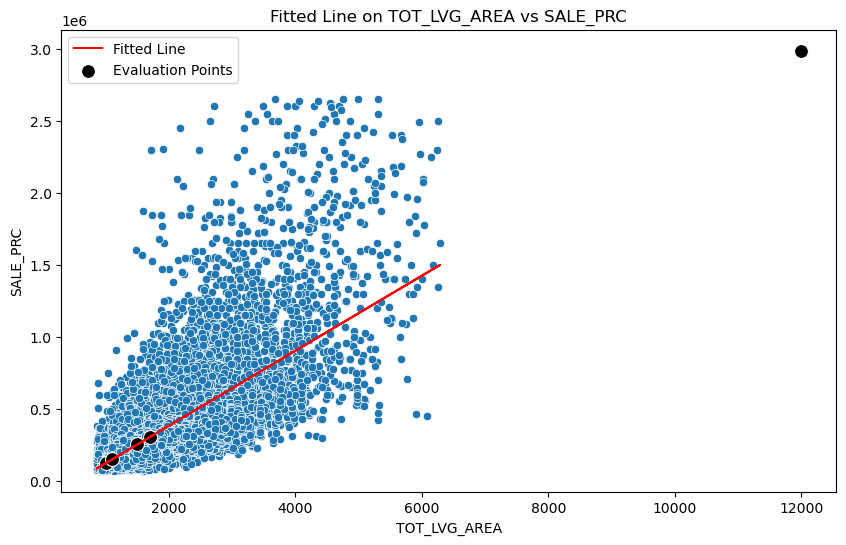

In [13]:
# Ploting the regression line and evaluation points
# Get a list of the evaluation points for TOT_LVG_AREA
tot_lvg_area_values = [point['TOT_LVG_AREA'] for point in data_points]

# Least squares coefficients
beta_1 = model.params['TOT_LVG_AREA']
beta_0 = model.params['const']

# Extracting SALE_PRC values using the regression equation for these TOT_LVG_AREA values
sale_prc_predicted_values = beta_0 + beta_1 * np.array(tot_lvg_area_values)

# Original plot with scatter points and regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=housing['TOT_LVG_AREA'], y=housing['SALE_PRC'])

# Plotting the regression line
plt.plot(housing['TOT_LVG_AREA'], beta_0 + beta_1 * housing['TOT_LVG_AREA'], color='red', label="Fitted Line")

# Adding the points from the dictionary with a different color and size
sns.scatterplot(x=tot_lvg_area_values, y=sale_prc_predicted_values, color='black', s=100, label="Evaluation Points")

# Title and legend
plt.title('Fitted Line on TOT_LVG_AREA vs SALE_PRC')
plt.legend()
plt.show()

# 4. Multiple Linear Regression

In [14]:
# Subset of the data with 4 predictors
X = pd.DataFrame(housing[['CNTR_DIST', 'HWY_DIST','OCEAN_DIST','TOT_LVG_AREA']])
y = housing['SALE_PRC']
# Fiting a Linear Model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# Printing a summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SALE_PRC   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     5578.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:37:41   Log-Likelihood:            -1.8959e+05
No. Observations:               13932   AIC:                         3.792e+05
Df Residuals:                   13927   BIC:                         3.792e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.313e+05   6057.748     21.673      0.000    1.19e+05    1.43e+05
CNTR_DIST       -3.2804      0.054    -60.347      0.000      -3.387      -3.174
HWY_DIST         6.1566      0.284     21.692      0.000       5.600       6.713
OCEAN_DIST      -3.0742      0.099    -31.194      0.000      -3.267      -2.881
TOT_LVG_AREA   263.9404      2.133    123.758      0.000     259.760     268.121
==============================================================================
Omnibus:                     7460.503   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112049.369
Skew:                           2.235   Prob(JB):                         0.00
Kurtosis:                      16.155   Cond. No.                     2.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Observations:
# -The R-squared value for the regression model is 0.616, indicating that this model explains approximately 61.6% 
# of the variance in the dependent variable (SALE_PRC). This is a good proportion and suggests that the model captures
# much of the variability in the response.

# -The model's adjusted R-squared is also 0.616, reiterating the model's explanatory power without redundancy among predictors.

# -The constant (intercept) of the model is 1.313e+05. This means, assuming all other predictors are zero, 
# the expected SALE_PRC is approximately $131,300.

# -CNTR_DIST has a negative coefficient of -3.2804, suggesting that for every one-unit increase in CNTR_DIST, 
# the SALE_PRC is expected to decrease by approximately $3.28.

# -HWY_DIST has a positive coefficient of 6.1566, which indicates a positive relationship. 
# For every one-unit increase in HWY_DIST, the SALE_PRC is expected to increase by around $6.16.

# -OCEAN_DIST, with a negative coefficient of -3.0742, shows that for every one-unit increase in OCEAN_DIST, 
# the SALE_PRC decreases by about $3.07.

# -TOT_LVG_AREA continues to demonstrate a strong positive relationship with SALE_PRC, with its coefficient of 263.9404.
# This implies that for each additional unit in TOT_LVG_AREA, the SALE_PRC is expected to rise by approximately $263.94.


### Model equation:

$\hat{SALE\_PRC_i} = 131,300 - 3.2804 \times CNTR\_DIST_i + 6.1566 \times HWY\_DIST_i - 3.0742 \times OCEAN\_DIST_i + 263.9404 \times TOT\_LVG\_AREA_i$

In [16]:
# Get lists of the evaluation points for all predictors
tot_lvg_area_values = []
ocean_dist_values = []
hwy_dist_values = []
cntr_dist_values = []

for point in data_points:
    tot_lvg_area_values.append(point['TOT_LVG_AREA'])
    ocean_dist_values.append(point['OCEAN_DIST'])
    hwy_dist_values.append(point['HWY_DIST'])
    cntr_dist_values.append(point['CNTR_DIST'])

# Extracting coefficients from the model
beta_0 = model.params['const']
beta_tot_lvg_area = model.params['TOT_LVG_AREA']
beta_ocean_dist = model.params['OCEAN_DIST']
beta_hwy_dist = model.params['HWY_DIST']
beta_cntr_dist = model.params['CNTR_DIST']

# Calculating SALE_PRC values using the multiple regression equation
sale_prc_values = (beta_0 +
                   beta_tot_lvg_area * np.array(tot_lvg_area_values) +
                   beta_ocean_dist * np.array(ocean_dist_values) +
                   beta_hwy_dist * np.array(hwy_dist_values) +
                   beta_cntr_dist * np.array(cntr_dist_values))

# Printing the SALE_PRC values along with the predictor values
for i, (tot_lvg_area, ocean_dist, hwy_dist, cntr_dist, sale_prc) in enumerate(zip(tot_lvg_area_values, ocean_dist_values, hwy_dist_values, cntr_dist_values, sale_prc_values)):
    print(f"Data Point {i+1} - TOT_LVG_AREA: {tot_lvg_area}, OCEAN_DIST: {ocean_dist}, HWY_DIST: {hwy_dist}, CNTR_DIST: {cntr_dist}, Estimated SALE_PRC: ${sale_prc:.2f}")

Data Point 1 - TOT_LVG_AREA: 1000, OCEAN_DIST: 11753, HWY_DIST: 18000, CNTR_DIST: 42000, Estimated SALE_PRC: $332140.19
Data Point 2 - TOT_LVG_AREA: 1700, OCEAN_DIST: 12000, HWY_DIST: 20000, CNTR_DIST: 50000, Estimated SALE_PRC: $502209.42
Data Point 3 - TOT_LVG_AREA: 12000, OCEAN_DIST: 10000, HWY_DIST: 15000, CNTR_DIST: 45000, Estimated SALE_PRC: $3212562.92
Data Point 4 - TOT_LVG_AREA: 1100, OCEAN_DIST: 16000, HWY_DIST: 12000, CNTR_DIST: 48000, Estimated SALE_PRC: $288856.03
Data Point 5 - TOT_LVG_AREA: 1500, OCEAN_DIST: 5000, HWY_DIST: 2000, CNTR_DIST: 53000, Estimated SALE_PRC: $350280.76


# 5. Logistic Regression

In [17]:
# Compute the median sale price
median_sale_price = housing['SALE_PRC'].median()

# Create a binary variable 'HighPrice', where 1 indicates a sale price greater than the median, and 0 otherwise
housing['HighPrice'] = np.where(housing['SALE_PRC'] > median_sale_price, 1, 0)

In [18]:
housing.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,HighPrice
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997,0.499354
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444,0.500018
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000,0.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000,0.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000,1.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000,1.000000


In [19]:
housing.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,HighPrice
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4,1
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4,1
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,1
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4,1
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4,1


In [20]:
# Prepare data for logistic regression using 'TOT_LVG_AREA' and 'SALE_PRC' as predictors
X = housing[['OCEAN_DIST', 'CNTR_DIST']]
X = sm.add_constant(X)  # Adding a constant for intercept
y = housing['HighPrice']

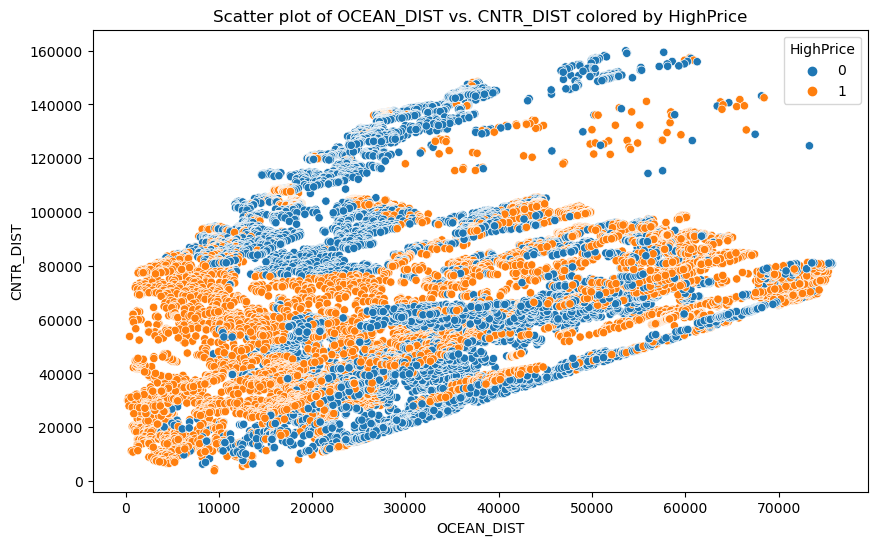

In [21]:
# Visualizing the data
# Scatter plot with color coded for LargeArea
plt.figure(figsize=(10,6))
sns.scatterplot(x='OCEAN_DIST', y='CNTR_DIST', hue='HighPrice', data=housing)
plt.title('Scatter plot of OCEAN_DIST vs. CNTR_DIST colored by HighPrice')
plt.show()

In [22]:
# Build the logistic regression model
model = sm.Logit(y, X).fit()
# Display model summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.678697
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              HighPrice   No. Observations:                13932
Model:                          Logit   Df Residuals:                    13929
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                 0.02085
Time:                        14:37:41   Log-Likelihood:                -9455.6
converged:                       True   LL-Null:                       -9656.9
Covariance Type:            nonrobust   LLR p-value:                 3.730e-88
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7729      0.047     16.419      0.000       0.681       0.865
OCEAN_DIST -1.666e-06      1e-06     -1.662      0.096   -3.63e-06    2.98e-07
CNTR_DIST  -1.057e-05   5.67e-07    -18.652      0.000   -1.17e-05   -9.46e-06
==============================================================================
"""

In [23]:
# Observations:
# -OCEAN_DIST: For a one-unit increase in OCEAN_DIST, the log odds of HighPrice decrease by 1.666e-06, holding other predictors 
# constant.This suggests that properties further from the ocean have slightly lower odds of being high-priced properties,
#but it's important to note that this predictor's p-value is greater than 0.05, making it statistically insignificant at the 95% confidence level.

# -CNTR_DIST: For a one-unit increase in CNTR_DIST, the log odds of HighPrice decrease by 1.057e-05, holding other predictors constant.
# This suggests that properties located further from the city center have lower odds of being high-priced properties. This predictor
# is statistically significant given its p-value is less than 0.05.

# - Constant (Intercept): The constant term is 0.7729, which represents the log odds of HighPrice when all predictors are zero. 

### Model equation

$ \log \left( \frac{p}{1-p} \right) = 0.7729 - 1.666 \times 10^{-6} \times \text{OCEAN_DIST} - 1.057 \times 10^{-5} \times \text{CNTR_DIST}$

$ p = \frac{e^{(0.7729 - 1.666 \times 10^{-6} \times \text{OCEAN_DIST} - 1.057 \times 10^{-5} \times \text{CNTR_DIST})}}{1 + e^{(0.7729 - 1.666 \times 10^{-6} \times \text{OCEAN_DIST} - 1.057 \times 10^{-5} \times \text{CNTR_DIST})}}$

In [24]:
# Extract coefficients from the model
coef_const = model.params['const']
coef_ocean_dist = model.params['OCEAN_DIST']
coef_cntr_dist = model.params['CNTR_DIST']

# Extract predictor values for each point in the evaluation set
# Assuming data_points is your evaluation set
ocean_dist_values = [point['OCEAN_DIST'] for point in data_points]
cntr_dist_values = [point['CNTR_DIST'] for point in data_points]

# Compute the log odds for each point
log_odds = coef_const + coef_ocean_dist * np.array(ocean_dist_values) + coef_cntr_dist * np.array(cntr_dist_values)

# Convert log odds to probability
probabilities = 1 / (1 + np.exp(-log_odds))

# Print out the predicted probabilities
for i, prob in enumerate(probabilities):
    print(f"Data Point {i+1}: Probability of HighPrice = {prob:.4f}")


Data Point 1: Probability of HighPrice = 0.5767
Data Point 2: Probability of HighPrice = 0.5559
Data Point 3: Probability of HighPrice = 0.5697
Data Point 4: Probability of HighPrice = 0.5594
Data Point 5: Probability of HighPrice = 0.5509
